# Introduction -- Reminder

Each Python lab will start with a pre-flight exercise that walks through building some of the set up and tools ($\sim$ 30 min), followed by an in-class tutorial with time for Q+A (50 min) so you can walk through steps that will be necessary for the homework assignment you will submit ($\sim$ 3 hrs).  Each lab will contain starter code, similar to what you see below.  Please fill in the code to complete the pre-flight assignment in preparation for the in-class tutorial.  

Preflight ($\sim$30-60 min, 10 points) **Typically due: Wednesdays 3pm EST**

*Preflight typically graded by Wednesday 5p EST*

In-class tutorial and Q+A ($\sim$ 50 min, 10 points) **Typically occurs: Thursdays 9am EST**

Homework assignment ($\sim$ 3-5 hrs, 30 points) **Typically due: Mondays 9am EST** 

*Homework typically graded by Thursday 5p*

When we grade your homework, we will not run your code. Once submitted, your notebook should have the outputs for all of your results.  Please do not include long outputs from debugging, beyond a few print statements and the requested visualizations (i.e. plots).

**Grading:** When we grade your notebook, we will convert the .ipynb file to an HTML file.  We will be using [nbgrader](https://nbgrader.readthedocs.io/en/stable/) to grade your notebooks.  **Note:** If your ```IPython``` version is too old, we will *not* be able to grade your assignments.


# Phys 260 Python Lab 4: Simulating the Capacitor (30 points total)

## Tutorial/HW summary
- Code review exercise:  relax_2d_potential
- Define boolean statements to identify plate positions
- Multi-axes visualization (i.e. subplots with matplotlib)
- Model the capacitor with a function to allow variations in configuration (i.e. d/L)
- 

## Numerical approaches -- when analytic approaches no longer hold

In the last tutorial/hw, you used the method of relaxation to find the potential inside a rectangular box, where the potential was specified on the sides. While that particular problem can be solved analytically (you will learn how to do this in Physics 405), the method of relaxation allows us to study problems that do not have an analytical solution. 

Consider the familiar example of a parallel-plate capacitor. In most physics classes, we pretend that the electric field between the plates can be approximated by the field of two infinite charged planes, so it's constant in between the plates and zero everywhere outside. Here's a typical illustration of this approximation:

<img src="capacitor.gif" alt="Parallel-plate capacitor" style="width: 200px;"/>

This is an idealization, like frictionless surfaces and masssless springs. The approximation works as long as the linear dimensions of the plates are large compared to the separation: $A\gg d^2$. In this assignment we'll apply this technique to understand what the electric field of a parallel-plate capacitor *really* looks like, and learn how the usual approximation starts to break down as the plate separation increases.

Much of the code in this assignment overlaps with the last tutorial/hw and the recent preflight.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

**Quick group exercise** (2 points -- 2 min):  You'll notice that we define the meshgrid below in terms of the number of points, `num_points_1d`, the indexing, and the `grid_extent` to the left/right, top/bottom.  Define `grid_spacing` in terms of the extent and number of points

In [175]:
#  Generate x,y coordinates on the rectangular grid.
num_points_1d = 100
indexing = 'ij'
grid_extent = 4
x_positions, y_positions = np.meshgrid(np.linspace(-grid_extent,grid_extent,num_points_1d), 
                                       np.linspace(-grid_extent,grid_extent,num_points_1d),
                                       indexing=indexing) 
position_array = np.array([x_positions,y_positions])
potential_array = np.zeros(x_positions.shape)

# Define grid_spacing below
### BEGIN SOLUTION
grid_spacing = 2*grid_extent / num_points_1d
### END SOLUTION

In [176]:
"""Execute to make sure you're on the right track"""
assert(grid_spacing<1)
### BEGIN HIDDEN TESTS
assert(grid_spacing == 2*grid_extent/num_points_1d)
### END HIDDEN TESTS

## Review of relevant functions and code:  Exercise in code review

[*Code review*](https://medium.com/palantir/code-review-best-practices-19e02780015f) is an important component of any software development.  Briefly, code review is the process by which another person (or people) review code for the purposes of helping to debug, make more readable, or otherwise. 

Super aside, the term "bug" in a code comes from the [first incident](https://www.computerhistory.org/tdih/september/9/) when an actual bug was found in a computer (a moth was trapped).  The incident was logged by, and later popularized by, computer-language pioneer Grace Hopper: [Grace Hopper's Bug](https://www.nationalgeographic.org/thisday/sep9/worlds-first-computer-bug/).

Aside from improving code, code review is also a nice opportunity to pick up on tips, tricks, more efficient coding habits, etc.  Like asking and answering questions, it is yet another way to learn from one another.

**Group exercise** (5 min -- 2 points): Below are the definitions of functions `set_boundary_conditions_rectangle` (you saw this previously as `set_boundary_conditions`) and `relax_potential_2d`.  I have inserted bugs in the code for the functions.  Try executing the next three code cells.  You'll find that the `while` loop is stuck.  The bug in `set_boundary_conditions_rectangle` is more of a redundancy (not quite a bug).  

First, identify the redundancy in `set_boundary_conditions_rectangle`, and remove it.  Hint:  The first exercise from the preflight, where we look at how different python objects change (or don't change) when passed to a function, is relevant.  Also, recall how we used `set_boundary_conditions` in the preflight.  


In [205]:
def set_boundary_conditions_rectangle(potential_array, pts_in_meshgrid, 
                                        bounds_left=0, bounds_right=0, 
                                        bounds_top=100, bounds_bottom=-100) :
    """ Returns potential array with set boundary conditions.  Sets in order of x edges, y edges, then z edges (if 3-d)

    Inputs:
    potential_array (n by m-darray) : array containing the potential at each sampled point 
    pts_in_meshgrid (n by m-darray) : x, y coordinates from the grid
    bounds_right (float) : value of potential on right edge
    bounds_left (float) : value of potential on left edge
    bounds_top (float) : value of potential on top edge
    bounds_bottom (float) : value of potential on bottom edge

    Outputs:
    potential_array (n by m-darray) : array containing the potential at each sampled point with boundary conditions set 
    """
    
    assert(potential_array.shape == pts_in_meshgrid[0].shape)
    
    # Separate out the position arrays along each axis for readability
    x_positions = pts_in_meshgrid[0]
    y_positions = pts_in_meshgrid[1]

    # Identify the edges
    right_edge_mask = np.where(x_positions == x_positions.max())
    left_edge_mask = np.where(x_positions == x_positions.min())
    top_edge_mask = np.where(y_positions == y_positions.max())
    bottom_edge_mask = np.where(y_positions == y_positions.min())
    
    # Set the bounds
    potential_array[right_edge_mask] = bounds_right    
    potential_array[left_edge_mask] = bounds_left
    potential_array[top_edge_mask] = bounds_top
    potential_array[bottom_edge_mask] = bounds_bottom
    
    ### BEGIN SOLUTION
    return
    ### END SOLUTION

    return potential_array

In [309]:
"""Execute to check you're on the right track"""
test_potential_array = potential_array
set_boundary_conditions_rectangle(test_potential_array, np.array([x_positions, y_positions]))
assert(test_potential_array.shape == potential_array.shape)
### BEGIN HIDDEN TESTS
assert(set_boundary_conditions_rectangle(potential_array, np.array([x_positions, y_positions])) == None)
### END HIDDEN TESTS

**Open question** (2 points -- take home): Why was the original code redundant?

**Answer**:  We don't need a return at all.  The array, `potential_array` that is passed to the function is element-wise changed in the function.  We can simply execute `set_boundary_conditions_rectangle`, and the array passed as the first argument will have boundary conditions set.  

**Group exercise** (5 min -- 2 points): There are two bugs in the function below.  The first bug is related to the adjustment we made when we removed the redundancy in `set_boundary_conditions`, which assumes `set_boundary_conditions` will be used a certain way.  See what happens before you fix that bug and after you fix that bug.  The second bug will affect how the `while` loop proceeds.  Fix that bug as well.  *Note*: You'll notice some other key differences in this version of `relax_potential_2d`.  Namely, it takes in the boundary conditions function as an argument, and also takes in a generalization of keyword arguments for that function with the `**`.  These are not bugs, but we will talk about these differences.

In [227]:
def relax_potential_2d( potential_array, pts_in_meshgrid, 
                           bc_func=set_boundary_conditions_rectangle,
                            **bc_func_kwargs ) :
    """Returns relaxed 2-d potential array with set boundary conditions.  

    Inputs:
    potential_array (n-darray) : array containing the potential at each sampled point 
    pts_in_meshgrid (n by m-darray) : x, y coordinates from the grid 
    bc_func (function) : function that sets boundary conditions, default set_boundary_conditions_rectangle
    **bc_func_kwarg : any key word arguments for bc_func

    Outputs:
    relaxed_potential (n-darray) : array containing the relaxed potential at each sampled point with boundary conditions set     
    """
    
    # Define potential_left, right, top, and bottom
    potential_bottom = np.roll(potential_array, -1, axis=0)
    potential_top = np.roll(potential_array, 1, axis=0)
    potential_left = np.roll(potential_array, -1, axis=1)
    potential_right = np.roll(potential_array, 1, axis=1)

    relaxed_potential = np.mean(np.array([potential_left, potential_right, 
                                          potential_top, potential_bottom]),axis=0)
    assert(relaxed_potential.shape == potential_array.shape)
    
    ### BEGIN SOLUTION
    potential_array = relaxed_potential
    ### END SOLUTION
    
    relaxed_potential = bc_func(potential_array, pts_in_meshgrid, **bc_func_kwargs)
    
    ### BEGIN SOLUTION
    relaxed_potential = potential_array
    ### END SOLUTION
    
    return relaxed_potential

**Open question** (2 points -- take home):  Describe why you needed to change `relax_potential_2d` given the change in `set_boundary_conditions`.  What happened in the loop below?  What was the second change you made?

**Answer**: If `set_boundary_conditions` has no return statement, it returns `None`.  The code below then has `relaxed_potential` set to `None`. We can first remove the `relaxed_potential = ` in the second to last line of the function.  

The second change is that we need to `set_boundary_conditions` of the `relaxed_potential`, not `potential_array`.  


In [228]:
convergence_criterion = 0.01
largest_iteration_difference = 1 # initialize

# Initialize the potential
potential_2d = np.zeros(x_positions.shape) # or set_boundary_conditions_2d(np.zeros(x_positions.shape))

# Collect the largest_iteration_difference
largest_iteration_differences = []

while largest_iteration_difference > convergence_criterion :
    relaxed_potential = relax_potential_2d(potential_2d, position_array, 
                                            bc_func=set_boundary_conditions_rectangle,
                                            bounds_left=0, bounds_right=0, 
                                            bounds_top=100, bounds_bottom=-100)

    largest_iteration_difference = np.max(np.abs(relaxed_potential - potential_2d))
    largest_iteration_differences.append(largest_iteration_difference)
    potential_2d = relaxed_potential

print(potential_2d)

[[-100.            0.            0.         ...    0.
     0.          100.        ]
 [-100.          -49.96117278  -30.15713619 ...   30.15713619
    49.96117278  100.        ]
 [-100.          -69.68764127  -49.84486382 ...   49.84486382
    69.68764127  100.        ]
 ...
 [-100.          -69.68764127  -49.84486382 ...   49.84486382
    69.68764127  100.        ]
 [-100.          -49.96117278  -30.15713619 ...   30.15713619
    49.96117278  100.        ]
 [-100.            0.            0.         ...    0.
     0.          100.        ]]


1660


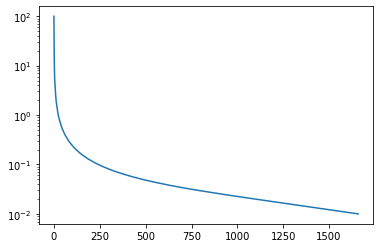

In [229]:
print(len(largest_iteration_differences))
plt.plot(largest_iteration_differences)
plt.yscale('log')

**Open question** (2 points): 
- Describe what the bug in the code would do in the while loop and why.

**Answer**:
- NEED TO CHECK THE PROCESS

Below, we include the function to calculate the electric field for any potential.

In [230]:
def calc_efield_2d(potential_array) : 
    """Calculate the electric field in one dimension

    Inputs:
    potential_array (nxm array) : array containing the potential at each sampled point 

    Outputs:
    efield_array (2xnxm darray) : array containing the corresponding efield at each sampled point     
    """
    
    return -np.array([np.gradient(potential_array,axis=0),
                     np.gradient(potential_array,axis=1)])

## The case of parallel plate capacitors

The rest of this tutorial/hw will model a parallel-plate capacitor with width $L$ pixels and separation $d$. We will care about how the ratio, $d/L$, impacts the electric field.  So, (1) we will keep $L$ fixed to extend across 1/2 the total width of points sampled and (2) we will vary $d$.

<img src="cap-illustration.png" alt="parallel-plate capacitor" style="width: 400px;"/>

### Define a boolean statement
**Group exercise:** (2 points -- 5 min)  We will assume each plate is sampled by a line of points parallel to the x-axis.  Note, if $L$ is fixed to extend across 1/2 the total width of the points sampled and the plates lie parallel to the x-axis, the plates are sampled by points whose x coordinate values have absolute values less than or equal to half the maximum x coordinate value.  Write the boolean statement that picks out the `plate_x_boolean` of the plates.  `plate_x_boolean` should look like an array of True and False.

In [231]:
# Define plate_x_boolean here
### BEGIN SOLUTION
plate_x_boolean = np.abs(x_positions) <= x_positions.max()* 1/2
### END SOLUTION

In [232]:
"""Execute to check you're on the right track"""
assert(plate_x_boolean.shape == x_positions.shape)
### BEGIN HIDDEN TESTS
assert((plate_x_boolean == (np.abs(x_positions) <= x_positions.max()/2)).all())
### END HIDDEN TESTS

**Filling out a function**: (2 points -- take home) The previous exercise identified a 2-d swath containing the plates (where the x-coordinates matched those of the plates).  We will also assume that the plates are equidistant from the x-axis, with a distance as close to $d/2$ as possible (given the meshgrid spacing).  This will give us a line of points corresponding to each plate.  Below, we define a function that returns the `top_y_boolean` and the `bottom_y_boolean`. 

You will need to fill in `find_plate_points`: 
- Define plate_x_boolean using the kwarg `fractional_plate_width`.  In the exercise above, we assumed this is 1/2.  
- Define `plate_y_boolean_top` and `plate_y_boolean_bottom` using the function `find_plate_y_booleans`.

In [233]:
def find_plate_y_booleans(d, y_position_array) :
    """Returns the booleans corresponding to y positions that are a distance d/2 pixels above and below the x axis
    
    Inputs:
    d (float) : distance separating capacitor plates 
    y_position_array (n by m-darray) : array of the y coordinates of the sampled points

    Outputs:
    top_y_boolean (n by m-darray) : array containing True for y coordinates closest to d/2 
    bottom_y_boolean (n by m-darray) : array containing True for y coordinates closest to -d/2 
    """
    
    assert(d >= grid_spacing)
    
    top_y_boolean = np.abs(y_position_array-d/2) == np.min(np.abs(y_position_array-d/2))
    bottom_y_boolean = np.abs(y_position_array+d/2) == np.min(np.abs(y_position_array+d/2))
    
    return top_y_boolean, bottom_y_boolean

def find_plate_points(d, x_position_array, y_position_array, fractional_plate_width = 1/2) :
    """Returns the indices for top and bottom plates, given d and x/y coordinates.
    
    Inputs:
    d (float) : number of grid points separating capacitor plates 
    x_position_array (n by m-darray) : array of the y coordinates of the sampled points
    y_position_array (n by m-darray) : array of the y coordinates of the sampled points
    fractional_plate_width (float) : fractional width of sampled points that the plate extends across

    Outputs:
    top_plate_indices (tuple) : tuple containing indices of top plate
    bottom_plate_indices (tuple) : tuple containing indices of bottom plate
    """
    
    # Define plate_x_boolean using the kwarg fractional_plate_width below
    ### BEGIN SOLUTION
    plate_x_boolean = np.abs(x_positions) <= x_positions.max() * fractional_plate_width
    ### END SOLUTION
    
    # Define plate_y_boolean_top and plate_y_boolean_bottom using the function find_plate_y_booleans
    ### BEGIN SOLUTION
    plate_y_boolean_top, plate_y_boolean_bottom = find_plate_y_booleans(d, y_position_array)
    ### END SOLUTION

    # Define top_plate_indices and bottom_plate_indices using np.where
    top_plate_indices = np.where(plate_x_boolean & plate_y_boolean_top)
    bottom_plate_indices = np.where(plate_x_boolean & plate_y_boolean_bottom)
        
    return top_plate_indices, bottom_plate_indices

In [234]:
"""Execute to check you're on the right track"""
assert(type(find_plate_points(0.1, x_positions, y_positions)) == tuple)
assert(type(find_plate_points(0.1, x_positions, y_positions)[0]) == tuple)
assert(len(find_plate_points(0.1, x_positions, y_positions)[0][1]) > \
        len(find_plate_points(0.1, x_positions, y_positions, fractional_plate_width=0.25)[0][1]))
### BEGIN HIDDEN TESTS
# [0][1] and [1][1] for 'ij' indexing, [0][0] and [1][0] for 'xy' indexing
if indexing == 'ij' :
    assert((np.array(find_plate_points(0.1, x_positions, y_positions, fractional_plate_width=0.25)[0][1] == num_points_1d/2)).all())
    assert((np.array(find_plate_points(0.1, x_positions, y_positions, fractional_plate_width=0.25)[1][1] == num_points_1d/2-1)).all())
elif indexing == 'xy' :
    assert((np.array(find_plate_points(0.1, x_positions, y_positions, fractional_plate_width=0.25)[0][0] == num_points_1d/2)).all())
    assert((np.array(find_plate_points(0.1, x_positions, y_positions, fractional_plate_width=0.25)[1][0] == num_points_1d/2-1)).all()) 
else :
    raise NotImplementedError("indexing is not defined")
### END HIDDEN TESTS

**Set capacitor conditions**: (2 points -- Take home) Fill out the missing line in `set_capacitor_conditions` below.  Make sure to use `find_plate_points` for full credit.

In [235]:
def set_capacitor_conditions(potential_array, pts_in_meshgrid, 
                                 d=.5, bounds_top=100, bounds_bottom=-100, 
                                 fractional_plate_width=0.5,) :
    """ Modifies potential array with set boundary conditions for a capacitor

    Inputs:
    potential_array (n by m-darray) : array containing the potential at each sampled point 
    pts_in_meshgrid (n by m-darray) : x, y coordinates from the grid 
    d (float) : distance separating capacitor plates 
    bounds_top (float) : value of potential on top plate
    bounds_bottom (float) : value of potential on bottom plate
    fractional_plate_width (float) : fractional width of sampled points that the plate extends across 
    
    Outputs:
    None
    """
    
    x_positions = pts_in_meshgrid[0]
    y_positions = pts_in_meshgrid[1]
    
    assert(potential_array.shape == x_positions.shape)

    # Identify the plate indices, top_plate_mask and bottom_plate_mask
    ### BEGIN SOLUTION
    top_plate_mask, bottom_plate_mask = find_plate_points(d, 
                                                        x_positions, 
                                                        y_positions,
                                                        fractional_plate_width=fractional_plate_width)
    ### END SOLUTION
    
    # Set the bounds
    potential_array[bottom_plate_mask] = bounds_bottom
    potential_array[top_plate_mask] = bounds_top


In [236]:
"""Execute to check you're on the right track"""
test_potential = potential_2d
set_capacitor_conditions(test_potential, position_array, d=.1, fractional_plate_width=0.25)
assert(test_potential.shape == potential_2d.shape)
### BEGIN HIDDEN TESTS
top_plate_mask, bottom_plate_mask = find_plate_points(.1,x_positions,y_positions, fractional_plate_width=0.25)
assert((test_potential[bottom_plate_mask] == -100).all())
assert((test_potential[top_plate_mask] == 100).all())
### END HIDDEN TESTS

## Write a function to model the capacitor (5 points -- Take home)

Below, we write a function to model the capacitor.  Note, we've essentially taken the contents of the cell with the `while` loop several cells above, and put that into a function.  The primary reason this is in a function is so we can vary over `d` by simply calling this function again with a different value for the key word argument `d`.  The crucial difference here is in how `relaxed_potential` gets defined in each iteration of the while loop. 

Fill in the necessary code below to define `relaxed_potential` in each iteration.  You'll need to properly call `relax_potential_2d` for the case of the capacitor.  *Hint*: Most of the key word arguments of `model_capacitor` are relevant to `set_capacitor_conditions`.

In [278]:
def model_capacitor(position_array, convergence_criterion = 0.01, 
                    d=.1, fractional_plate_width=0.5,
                   bounds_top=100, bounds_bottom=-100) :
    """ Models the capacitor with set boundary conditions for a capacitor

    Inputs:
    position_array (2 by n by m-darray) : x, y coordinates from the grid 
    convergence_criterion (float) : fractional width of sampled points that the plate extends across   
    d (float) : distance separating capacitor plates 
    fractional_plate_width (float) : fractional width of sampled points that the plate extends across   
    bounds_top (float) : value of potential on top plate
    bounds_bottom (float) : value of potential on bottom plate
    

    Outputs:
    potential_2d (n by m-darray) : Modeled 2d potential of the capacitor
    """

    largest_iteration_difference = 1 # initialize

    # Initialize the potential
    potential_2d = np.zeros(x_positions.shape) 

    # Collect the largest_iteration_difference
    largest_iteration_differences = []

    while largest_iteration_difference > convergence_criterion :
        # Define the relaxed potential below using relax_potential_2d with the appropriate args and kwargs
        ### BEGIN SOLUTION
        relaxed_potential = relax_potential_2d(potential_2d, position_array, 
                                                bc_func=set_capacitor_conditions,
                                                d=d, fractional_plate_width=fractional_plate_width,
                                                bounds_top=100, bounds_bottom=-100)
        ### END SOLUTION

        largest_iteration_difference = np.max(np.abs(relaxed_potential - potential_2d))
        largest_iteration_differences.append(largest_iteration_difference)
        potential_2d = relaxed_potential
    
    print("Modeled with ", len(largest_iteration_differences), "iterations")
    
    return potential_2d



In [279]:
"""Execute to check you're on the right track"""
test_capacitor = model_capacitor(position_array) 
assert(test_capacitor.shape == x_positions.shape)
### BEGIN HIDDEN TESTS

largest_iteration_difference = 1 # initialize

# Initialize the potential
potential_2d = np.zeros(x_positions.shape) 

while largest_iteration_difference > convergence_criterion :
    relaxed_potential = relax_potential_2d(potential_2d, position_array, 
                                            bc_func=set_capacitor_conditions, 
                                              d=.1, fractional_plate_width=0.5,
                                               bounds_top=100, bounds_bottom=-100)
        

    largest_iteration_difference = np.max(np.abs(relaxed_potential - potential_2d))
    potential_2d = relaxed_potential
assert((test_capacitor == potential_2d).all())
### END HIDDEN TESTS

Modeled with  1457 iterations


## Group Exercise if there is timeMake an nxm figure with a loop (2 points -- 5min)

From the preflight, you made a figure with 1x2 axes.  In the cell below, we show the analog for figure with subplots in a 2x2 configuration where each axis (subplot) shows $f(x) = x^n$, where n ranges from 0 to 3.  For this exercise, make the same 2x2 figure.  However, do this in a `for` loop, and we will iterate over both the iteration number of the axis, `n`, and the axis itself. 

Text(0, 0.5, 'f(x)=x**2')

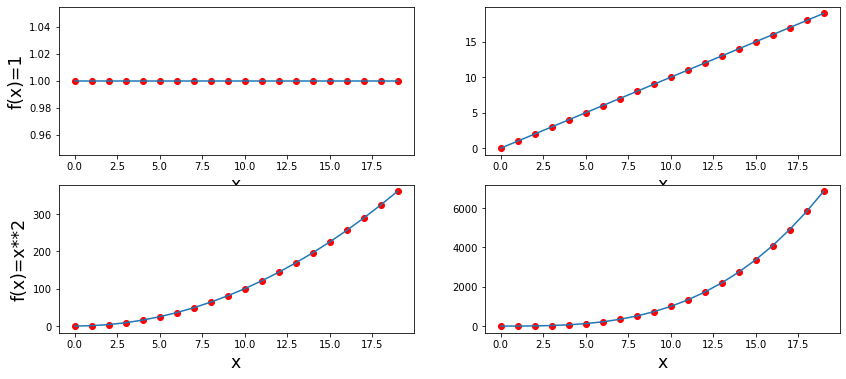

In [280]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(14,6))

x = np.arange(20)

n=0
ax1.plot(x, x**n)
ax1.scatter(x, x**n, color='r')
ax1.set_xlabel('x', fontsize='xx-large')

n=1
ax2.plot(x, x**n)
ax2.scatter(x, x**n, color='r')
ax2.set_xlabel('x', fontsize='xx-large')

n=2
ax3.plot(x, x**n)
ax3.scatter(x, x**n, color='r')
ax3.set_xlabel('x', fontsize='xx-large')

n=3
ax4.plot(x, x**n)
ax4.scatter(x, x**n, color='r')
ax4.set_xlabel('x', fontsize='xx-large')


ax1.set_ylabel('f(x)=1', fontsize='xx-large')
ax3.set_ylabel('f(x)=x**2', fontsize='xx-large')    

0 AxesSubplot(0.125,0.536818;0.352273x0.343182)
1 AxesSubplot(0.547727,0.536818;0.352273x0.343182)
2 AxesSubplot(0.125,0.125;0.352273x0.343182)
3 AxesSubplot(0.547727,0.125;0.352273x0.343182)


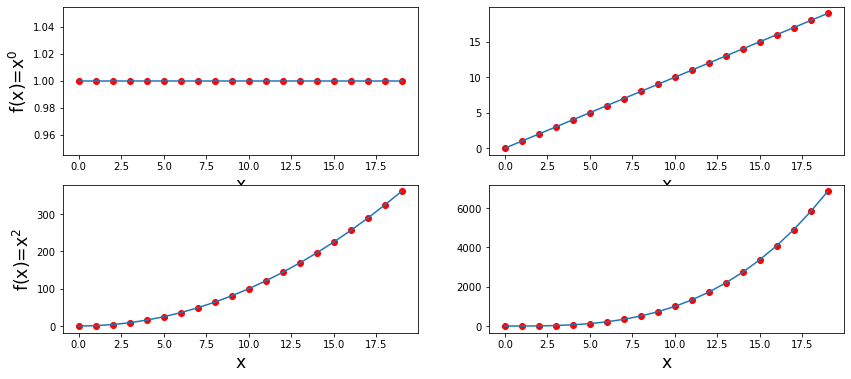

In [281]:
fig, axes = plt.subplots(2,2,figsize=(14,6))

x = np.arange(20)

for n, axis in enumerate(axes.flatten()) :
    print(n,axis)
    ### BEGIN SOLUTION
    axis.plot(x, x**n)
    axis.scatter(x, x**n, color='r')
    axis.set_xlabel('x', fontsize='xx-large')
    if n==0 or n==2:
        axis.set_ylabel('f(x)=x$^%d$'%n, fontsize='xx-large')
    ### END SOLUTION

## Visualizing different configurations of the capacitor

Recall, we had set $L$ to be half of the width of the meshgrid points, meaning it is as wide as the extent.  So, $d/L = d/$`grid_extent`.  We are interested in looking at how the field changes for a capacitor that is $d/L=0.1, 0.2, 0.3, 0.5, 1.0, 2.0$.  Below, define `capacitor_distances` such that `capacitor_distances` is an array of values of d that satisfy the different $d/L$.  This will need to be in terms of `grid_extent`.

In [282]:
# Define capacitor_distances here
### BEGIN SOLUTION
capacitor_distances = np.array([0.1, 0.2, 0.3, 0.5, 1.0, 2.0]) * grid_extent
### END SOLUTION

In [283]:
"""Execute to check you're on the right track"""
assert(capacitor_distances.shape == (6,))
### BEGIN HIDDEN TESTS
assert((capacitor_distances == np.array([0.1, 0.2, 0.3, 0.5, 1.0, 2.0]) * grid_extent).all())
### END HIDDEN TESTS

## Calculate capacitor potential for each configuration (2 points)

Use a `for` loop to calculate the capacitor potential for each configuration.  Collect in a list called `capacitor_potentials`.


In [285]:
# Define capacitor_potentials here
### BEGIN SOLUTION
capacitor_potentials = []
for capacitor_distance in capacitor_distances :
    capacitor_potentials.append(model_capacitor(position_array, d=capacitor_distance))
### END SOLUTION

Modeled with  1463 iterations
Modeled with  1448 iterations
Modeled with  1401 iterations
Modeled with  1318 iterations
Modeled with  1312 iterations
Modeled with  1457 iterations


In [286]:
"""Execute to check you're on the right track"""
assert(type(capacitor_potentials) == list)
### BEGIN HIDDEN TESTS
assert((capacitor_potentials[0] == model_capacitor(position_array, d=capacitor_distances[0])).all())
### END HIDDEN TESTS

Modeled with  1463 iterations


### New trick:  A list comprehension
Below, we use a *list comprehension* to collect the associated electric fields.  Can you see how we might have used this in the previous exercise?

In [287]:
capacitor_efields = [calc_efield_2d(capacitor_potential) for capacitor_potential in capacitor_potentials]

### Edges: Where the analytic assumptions break down
When working analytically, we assumed that the parallel plate capacitors are close enough to two infinite plates.  That inherently assumes that the electric field between the center of both plates is the same as that on the edges.  Below, we write a boolean statement to identify the center and the edge of the plates along the x-axis.

In [294]:

center_of_grid_index = np.where((np.abs(x_positions) == np.min(np.abs(x_positions))) & (np.abs(y_positions) == np.min(np.abs(y_positions))))

edge_of_capacitor_index = np.where((np.abs(x_positions-grid_extent/2) == np.min(np.abs(x_positions-grid_extent/2))) & (np.abs(y_positions) == np.min(np.abs(y_positions))))


### Collect the efield values

Below, we completely take advantage of list comprehensions to collect the magnitude of the electric field for each configuration, the magnitudes at the center, and the magnitudes at the edge.       

In [299]:
efield_magnitudes = [np.linalg.norm(efield, axis=0) for efield in capacitor_efields]
center_efields = [efield_magnitude[center_of_grid_index] for efield_magnitude in efield_magnitudes]
edge_efields = [efield_magnitude[edge_of_capacitor_index] for efield_magnitude in efield_magnitudes]

**Plot deviation from ideal** (2 points):
Plot the deviation from the ideal.  In the cell below, plot the ratio of the E field at the edge to the E field at the center as a function of d/L.  Label your figure, and make sure ratios are correct.

Text(0, 0.5, 'E edge / E center ratio')

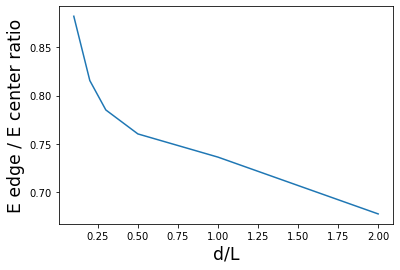

In [302]:
#  Plot relationship here
### BEGIN SOLUTION
plt.plot(capacitor_distances / grid_extent, np.array(edge_efields)/np.array(center_efields))
plt.xlabel('d/L', fontsize='xx-large')
plt.ylabel('E edge / E center ratio', fontsize='xx-large')
### END SOLUTION

### Visualize the capacitor 

Below, we visualize the results of our modeled capacitor for the default keyword arguments.

Text(0, 0.5, 'x-axis ')

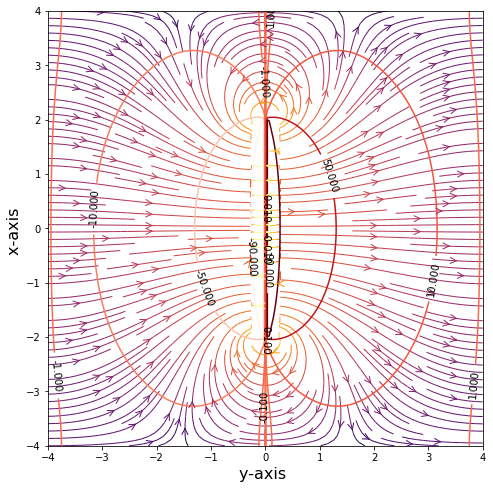

In [308]:
fig, ax = plt.subplots(1, figsize=(8,8))
levels = [-90, -50, -10, -1, -.1, -.01, .01, .1, 1, 10, 50, 90 ]

capacitor_potential = capacitor_potentials[0]
efield = calc_efield_2d(capacitor_potential)

emagnitude = 10*np.log(np.linalg.norm(efield, axis=0)) # We will color code by this

ax.streamplot(y_positions, x_positions,  
              efield[1], efield[0], 
              color=emagnitude, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

contour1 = ax.contour(y_positions,x_positions,potential_2d, levels=levels,cmap=plt.cm.Reds)
ax.clabel(contour1, fontsize=10, colors='black')  # label the contours

ax.set_aspect('equal')
ax.set_xlabel('y-axis ', fontsize=16)
ax.set_ylabel('x-axis ', fontsize=16)

## Compare with d=2

Text(0, 0.5, 'x-axis ')

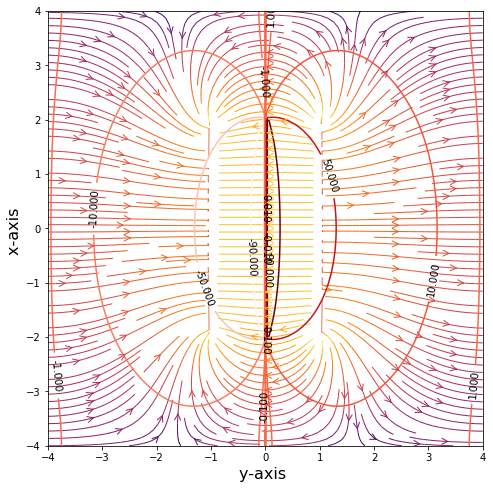

In [277]:
fig, ax = plt.subplots(1, figsize=(8,8))
levels = [-90, -50, -10, -1, -.1, -.01, .01, .1, 1, 10, 50, 90 ]

capacitor_potential, iterations = model_capacitor(position_array, d=2) 
efield = calc_efield_2d(capacitor_potential)

emagnitude = 10*np.log(np.linalg.norm(efield, axis=0)) # We will color code by this

ax.streamplot(y_positions, x_positions,  
              efield[1], efield[0], 
              color=emagnitude, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

contour1 = ax.contour(y_positions,x_positions,potential_2d, levels=levels,cmap=plt.cm.Reds)
ax.clabel(contour1, fontsize=10, colors='black')  # label the contours

ax.set_aspect('equal')
ax.set_xlabel('y-axis ', fontsize=16)
ax.set_ylabel('x-axis ', fontsize=16)

**Talk through your plots** (1 point) : Talk through the plots, from the Ratio vs. d/L plot through the two capacitor visualizations above.  Treat the "talk through" as figure captions that you might see in an article.

**Answer**:  The efield in the center and edges are more disparate as the plate separation increases.  You get a ringing field at the edge.